In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
iris = load_iris()
logreg = LogisticRegression()

In [3]:
import os, warnings
import numpy as np
# 경고 메시지 무시하거나 숨길때(ignore), 다시보이게(default)
# warnings.filterwarnings(action='default')
warnings.filterwarnings(action='ignore')

In [5]:
score = cross_val_score(logreg, iris.data, iris.target, cv=5)
score

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [6]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)

# 평가지표

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

(1797, 64)


<AxesSubplot:ylabel='count'>

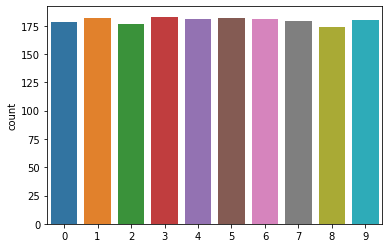

In [8]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.data.shape)

sns.countplot(digits.target)

In [9]:
X = digits.data
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    random_state=0)

<AxesSubplot:ylabel='count'>

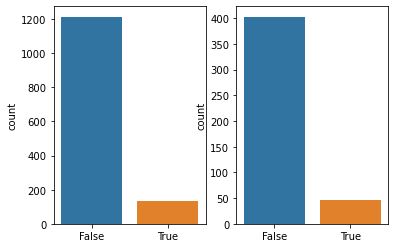

In [10]:
plt.subplot(1,2,1)
sns.countplot(y_train)

plt.subplot(1,2,2)
sns.countplot(y_test)

In [14]:
from sklearn.dummy import DummyClassifier
model = DummyClassifier(strategy='most_frequent')
model.fit(X_train, y_train)
pred = model.predict(X_test)

print("예측 값 : ", np.unique(pred))

print("학습용셋 정확도 : ", model.score(X_train, y_train))
print("테스트셋 정확도 : ", model.score(X_test, y_test))

예측 값 :  [False]
학습용셋 정확도 :  0.9012620638455828
테스트셋 정확도 :  0.8955555555555555


In [12]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred = model.predict(X_test)

print("예측 값 : ", np.unique(pred))

print("학습용셋 정확도 : ", model.score(X_train, y_train))
print("테스트셋 정확도 : ", model.score(X_test, y_test))

예측 값 :  [False  True]
학습용셋 정확도 :  0.9383815887156645
테스트셋 정확도 :  0.9177777777777778


In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=0.1).fit(X_train, y_train)
pred = model.predict(X_test)

print("예측 값 : ", np.unique(pred))

print("학습용셋 정확도 : ", model.score(X_train, y_train))
print("테스트셋 정확도 : ", model.score(X_test, y_test))

예측 값 :  [False  True]
학습용셋 정확도 :  0.9977728285077951
테스트셋 정확도 :  0.9844444444444445


In [16]:
score = cross_val_score(model,X_train,y_train)
score

array([0.9       , 0.9       , 0.90334572, 0.90334572, 0.89962825])

In [17]:
from sklearn.metrics import confusion_matrix

model = LogisticRegression(C=0.1).fit(X_train, y_train)
pred = model.predict(X_test)

matrix = confusion_matrix(y_test, pred)
print("오차 행렬 : \n{}".format(matrix))

오차 행렬 : 
[[402   1]
 [  6  41]]


# 정확도
*    모든 샘플중에 정확하게 예측한 비율

# 정밀도
*    예측을 양성으로 한 친구중에 잘 예측한 비율 

# 민감도(RECALL, 진짜 양성 비율)
*    실제 양성인 친구중에 잘 예측한 비율

# 특이도
*    실제 음성인 친구중에 잘 예측한 비율

# FPRate(가짜 양성 비율)
*    실제 음성인 데이터 중에 예측을 실패한 비율

In [18]:
### 빈도기반 모델
model = DummyClassifier(strategy='most_frequent')
model.fit(X_train, y_train)
pred = model.predict(X_test)

print("예측 값 : ", np.unique(pred))

print("학습용셋 정확도 : ", model.score(X_train, y_train))
print("테스트셋 정확도 : ", model.score(X_test, y_test))

예측 값 :  [False]
학습용셋 정확도 :  0.9012620638455828
테스트셋 정확도 :  0.8955555555555555


In [21]:
from sklearn.metrics import f1_score

In [22]:
### 빈도기반 모델
model = DummyClassifier(strategy='most_frequent')
model.fit(X_train, y_train)
pred = model.predict(X_test)

print("예측 값 : ", np.unique(pred))

print("학습용셋 정확도 : ", model.score(X_train, y_train))
print("테스트셋 정확도 : ", model.score(X_test, y_test))

print("F1-score : ", f1_score(y_test, pred))

예측 값 :  [False]
학습용셋 정확도 :  0.9012620638455828
테스트셋 정확도 :  0.8955555555555555
F1-score :  0.0


In [26]:
### 빈도기반 모델
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print("예측 값 : ", np.unique(pred))

print("학습용셋 정확도 : ", model.score(X_train, y_train))
print("테스트셋 정확도 : ", model.score(X_test, y_test))

print("F1-score : ", f1_score(y_test, pred))

예측 값 :  [False  True]
학습용셋 정확도 :  1.0
테스트셋 정확도 :  0.9555555555555556
F1-score :  0.7777777777777778


In [29]:
### 빈도기반 모델
model = LogisticRegression(C=0.1)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print("예측 값 : ", np.unique(pred))

print("학습용셋 정확도 : ", model.score(X_train, y_train))
print("테스트셋 정확도 : ", model.score(X_test, y_test))

print("F1-score : ", f1_score(y_test, pred))

예측 값 :  [False  True]
학습용셋 정확도 :  0.9977728285077951
테스트셋 정확도 :  0.9844444444444445
F1-score :  0.9213483146067415


In [32]:
score = cross_val_score(model, X_train, y_train, scoring='f1')
score.mean()

0.9403807502592281